This notebook is about raining and evaluating two different neural network models, a Multi-Layer Perceptron (MLP) and a Simple Convolutional Neural Network (CNN), on the CIFAR-10 dataset. It includes code for defining the models, loading and preprocessing the data, training the models, and evaluating their performance by plotting the training and test loss and accuracy over epochs, as well as the final test accuracy.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
# Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3*32*32, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.net(x)

# Define CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16x16x16
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32x8x8
            nn.Flatten(),
            nn.Linear(32*8*8, 10)
        )

    def forward(self, x):
        return self.net(x)


In [3]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

Using device: cuda


100%|██████████| 170M/170M [00:01<00:00, 103MB/s]


In [4]:
# 🧪 Evaluation
def evaluate(model, criterion):
    model.eval()
    correct = total = 0
    total_loss = 0 # Initialize total_loss
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = criterion(pred, y) # Calculate loss for each batch
            total_loss += loss.item() # Add loss to total_loss
            correct += (pred.argmax(dim=1) == y).sum().item()
            total += y.size(0)
    acc = correct / total * 100
    avg_test_loss = total_loss / len(test_loader) # Calculate average test loss
    print(f"Test Accuracy: {acc:.2f}%")
    print(f"Test Loss: {avg_test_loss:.2f}")
    return acc, avg_test_loss # Return both accuracy and test loss

Training MLP:


100%|██████████| 500/500 [00:12<00:00, 39.78it/s]


Test Accuracy: 46.82%
Test Loss: 1.51
Epoch 1: Train Loss = 1.65, Train Accuracy = 42.36%, Test Loss = 1.51, Test Accuracy = 46.82%


100%|██████████| 500/500 [00:11<00:00, 42.79it/s]


Test Accuracy: 49.72%
Test Loss: 1.45
Epoch 2: Train Loss = 1.45, Train Accuracy = 49.52%, Test Loss = 1.45, Test Accuracy = 49.72%


100%|██████████| 500/500 [00:11<00:00, 43.18it/s]


Test Accuracy: 50.55%
Test Loss: 1.44
Epoch 3: Train Loss = 1.35, Train Accuracy = 53.17%, Test Loss = 1.44, Test Accuracy = 50.55%


100%|██████████| 500/500 [00:11<00:00, 42.61it/s]


Test Accuracy: 48.89%
Test Loss: 1.50
Epoch 4: Train Loss = 1.29, Train Accuracy = 55.38%, Test Loss = 1.50, Test Accuracy = 48.89%


100%|██████████| 500/500 [00:11<00:00, 42.85it/s]


Test Accuracy: 52.29%
Test Loss: 1.43
Epoch 5: Train Loss = 1.21, Train Accuracy = 57.94%, Test Loss = 1.43, Test Accuracy = 52.29%


100%|██████████| 500/500 [00:11<00:00, 43.30it/s]


Test Accuracy: 52.03%
Test Loss: 1.47
Epoch 6: Train Loss = 1.16, Train Accuracy = 60.16%, Test Loss = 1.47, Test Accuracy = 52.03%


100%|██████████| 500/500 [00:11<00:00, 42.71it/s]


Test Accuracy: 51.01%
Test Loss: 1.51
Epoch 7: Train Loss = 1.10, Train Accuracy = 62.36%, Test Loss = 1.51, Test Accuracy = 51.01%


100%|██████████| 500/500 [00:11<00:00, 43.13it/s]


Test Accuracy: 51.83%
Test Loss: 1.48
Epoch 8: Train Loss = 1.05, Train Accuracy = 64.06%, Test Loss = 1.48, Test Accuracy = 51.83%


100%|██████████| 500/500 [00:11<00:00, 42.75it/s]


Test Accuracy: 52.18%
Test Loss: 1.54
Epoch 9: Train Loss = 0.99, Train Accuracy = 66.04%, Test Loss = 1.54, Test Accuracy = 52.18%


100%|██████████| 500/500 [00:11<00:00, 43.05it/s]


Test Accuracy: 51.56%
Test Loss: 1.56
Epoch 10: Train Loss = 0.94, Train Accuracy = 67.91%, Test Loss = 1.56, Test Accuracy = 51.56%


100%|██████████| 500/500 [00:11<00:00, 43.01it/s]


Test Accuracy: 52.21%
Test Loss: 1.57
Epoch 11: Train Loss = 0.90, Train Accuracy = 69.66%, Test Loss = 1.57, Test Accuracy = 52.21%


100%|██████████| 500/500 [00:11<00:00, 43.06it/s]


Test Accuracy: 53.33%
Test Loss: 1.60
Epoch 12: Train Loss = 0.85, Train Accuracy = 71.31%, Test Loss = 1.60, Test Accuracy = 53.33%


100%|██████████| 500/500 [00:11<00:00, 43.22it/s]


Test Accuracy: 52.08%
Test Loss: 1.67
Epoch 13: Train Loss = 0.81, Train Accuracy = 72.66%, Test Loss = 1.67, Test Accuracy = 52.08%


100%|██████████| 500/500 [00:11<00:00, 43.25it/s]


Test Accuracy: 51.17%
Test Loss: 1.72
Epoch 14: Train Loss = 0.76, Train Accuracy = 74.57%, Test Loss = 1.72, Test Accuracy = 51.17%


100%|██████████| 500/500 [00:11<00:00, 43.07it/s]


Test Accuracy: 51.59%
Test Loss: 1.87
Epoch 15: Train Loss = 0.72, Train Accuracy = 75.62%, Test Loss = 1.87, Test Accuracy = 51.59%


100%|██████████| 500/500 [00:11<00:00, 42.52it/s]


Test Accuracy: 51.57%
Test Loss: 1.86
Epoch 16: Train Loss = 0.70, Train Accuracy = 76.81%, Test Loss = 1.86, Test Accuracy = 51.57%


100%|██████████| 500/500 [00:11<00:00, 42.68it/s]


Test Accuracy: 52.77%
Test Loss: 1.84
Epoch 17: Train Loss = 0.66, Train Accuracy = 78.15%, Test Loss = 1.84, Test Accuracy = 52.77%


100%|██████████| 500/500 [00:11<00:00, 42.71it/s]


Test Accuracy: 52.14%
Test Loss: 1.89
Epoch 18: Train Loss = 0.62, Train Accuracy = 79.61%, Test Loss = 1.89, Test Accuracy = 52.14%


100%|██████████| 500/500 [00:11<00:00, 43.01it/s]


Test Accuracy: 52.79%
Test Loss: 1.92
Epoch 19: Train Loss = 0.59, Train Accuracy = 80.37%, Test Loss = 1.92, Test Accuracy = 52.79%


100%|██████████| 500/500 [00:11<00:00, 43.41it/s]


Test Accuracy: 51.46%
Test Loss: 2.08
Epoch 20: Train Loss = 0.56, Train Accuracy = 81.57%, Test Loss = 2.08, Test Accuracy = 51.46%


100%|██████████| 500/500 [00:11<00:00, 43.20it/s]


Test Accuracy: 51.69%
Test Loss: 2.20
Epoch 21: Train Loss = 0.56, Train Accuracy = 81.76%, Test Loss = 2.20, Test Accuracy = 51.69%


100%|██████████| 500/500 [00:11<00:00, 42.94it/s]


Test Accuracy: 51.40%
Test Loss: 2.26
Epoch 22: Train Loss = 0.50, Train Accuracy = 83.60%, Test Loss = 2.26, Test Accuracy = 51.40%


100%|██████████| 500/500 [00:11<00:00, 43.11it/s]


Test Accuracy: 49.46%
Test Loss: 2.46
Epoch 23: Train Loss = 0.49, Train Accuracy = 84.04%, Test Loss = 2.46, Test Accuracy = 49.46%


100%|██████████| 500/500 [00:11<00:00, 42.86it/s]


Test Accuracy: 50.19%
Test Loss: 2.50
Epoch 24: Train Loss = 0.46, Train Accuracy = 84.91%, Test Loss = 2.50, Test Accuracy = 50.19%


100%|██████████| 500/500 [00:11<00:00, 43.03it/s]


Test Accuracy: 51.83%
Test Loss: 2.34
Epoch 25: Train Loss = 0.48, Train Accuracy = 84.71%, Test Loss = 2.34, Test Accuracy = 51.83%


100%|██████████| 500/500 [00:11<00:00, 43.28it/s]


Test Accuracy: 51.41%
Test Loss: 2.45
Epoch 26: Train Loss = 0.43, Train Accuracy = 86.17%, Test Loss = 2.45, Test Accuracy = 51.41%


100%|██████████| 500/500 [00:11<00:00, 43.07it/s]


Test Accuracy: 51.90%
Test Loss: 2.45
Epoch 27: Train Loss = 0.42, Train Accuracy = 86.44%, Test Loss = 2.45, Test Accuracy = 51.90%


100%|██████████| 500/500 [00:11<00:00, 42.84it/s]


Test Accuracy: 51.68%
Test Loss: 2.62
Epoch 28: Train Loss = 0.40, Train Accuracy = 87.23%, Test Loss = 2.62, Test Accuracy = 51.68%


100%|██████████| 500/500 [00:11<00:00, 43.03it/s]


Test Accuracy: 51.43%
Test Loss: 2.64
Epoch 29: Train Loss = 0.39, Train Accuracy = 87.58%, Test Loss = 2.64, Test Accuracy = 51.43%


100%|██████████| 500/500 [00:11<00:00, 42.88it/s]


Test Accuracy: 52.23%
Test Loss: 2.70
Epoch 30: Train Loss = 0.39, Train Accuracy = 87.85%, Test Loss = 2.70, Test Accuracy = 52.23%

Training CNN:


100%|██████████| 500/500 [00:13<00:00, 38.40it/s]


Test Accuracy: 54.47%
Test Loss: 1.28
Epoch 1: Train Loss = 1.51, Train Accuracy = 46.53%, Test Loss = 1.28, Test Accuracy = 54.47%


100%|██████████| 500/500 [00:12<00:00, 40.77it/s]


Test Accuracy: 61.00%
Test Loss: 1.12
Epoch 2: Train Loss = 1.20, Train Accuracy = 58.17%, Test Loss = 1.12, Test Accuracy = 61.00%


100%|██████████| 500/500 [00:12<00:00, 40.53it/s]


Test Accuracy: 63.97%
Test Loss: 1.05
Epoch 3: Train Loss = 1.07, Train Accuracy = 62.89%, Test Loss = 1.05, Test Accuracy = 63.97%


100%|██████████| 500/500 [00:12<00:00, 40.92it/s]


Test Accuracy: 65.06%
Test Loss: 1.01
Epoch 4: Train Loss = 0.99, Train Accuracy = 65.84%, Test Loss = 1.01, Test Accuracy = 65.06%


100%|██████████| 500/500 [00:12<00:00, 40.40it/s]


Test Accuracy: 65.19%
Test Loss: 0.99
Epoch 5: Train Loss = 0.93, Train Accuracy = 67.62%, Test Loss = 0.99, Test Accuracy = 65.19%


100%|██████████| 500/500 [00:12<00:00, 40.12it/s]


Test Accuracy: 66.48%
Test Loss: 0.98
Epoch 6: Train Loss = 0.89, Train Accuracy = 69.38%, Test Loss = 0.98, Test Accuracy = 66.48%


100%|██████████| 500/500 [00:12<00:00, 39.93it/s]


Test Accuracy: 67.98%
Test Loss: 0.95
Epoch 7: Train Loss = 0.86, Train Accuracy = 70.41%, Test Loss = 0.95, Test Accuracy = 67.98%


100%|██████████| 500/500 [00:12<00:00, 40.58it/s]


Test Accuracy: 68.02%
Test Loss: 0.94
Epoch 8: Train Loss = 0.83, Train Accuracy = 71.50%, Test Loss = 0.94, Test Accuracy = 68.02%


100%|██████████| 500/500 [00:12<00:00, 40.67it/s]


Test Accuracy: 67.26%
Test Loss: 0.94
Epoch 9: Train Loss = 0.81, Train Accuracy = 72.19%, Test Loss = 0.94, Test Accuracy = 67.26%


100%|██████████| 500/500 [00:12<00:00, 40.56it/s]


Test Accuracy: 68.40%
Test Loss: 0.93
Epoch 10: Train Loss = 0.79, Train Accuracy = 72.95%, Test Loss = 0.93, Test Accuracy = 68.40%


100%|██████████| 500/500 [00:12<00:00, 40.40it/s]


Test Accuracy: 69.30%
Test Loss: 0.91
Epoch 11: Train Loss = 0.77, Train Accuracy = 73.44%, Test Loss = 0.91, Test Accuracy = 69.30%


100%|██████████| 500/500 [00:12<00:00, 40.58it/s]


Test Accuracy: 68.26%
Test Loss: 0.94
Epoch 12: Train Loss = 0.75, Train Accuracy = 74.08%, Test Loss = 0.94, Test Accuracy = 68.26%


100%|██████████| 500/500 [00:12<00:00, 40.06it/s]


Test Accuracy: 69.39%
Test Loss: 0.91
Epoch 13: Train Loss = 0.73, Train Accuracy = 74.87%, Test Loss = 0.91, Test Accuracy = 69.39%


100%|██████████| 500/500 [00:12<00:00, 40.44it/s]


Test Accuracy: 68.07%
Test Loss: 0.94
Epoch 14: Train Loss = 0.72, Train Accuracy = 75.42%, Test Loss = 0.94, Test Accuracy = 68.07%


100%|██████████| 500/500 [00:12<00:00, 40.23it/s]


Test Accuracy: 68.87%
Test Loss: 0.92
Epoch 15: Train Loss = 0.71, Train Accuracy = 75.64%, Test Loss = 0.92, Test Accuracy = 68.87%


100%|██████████| 500/500 [00:12<00:00, 40.57it/s]


Test Accuracy: 68.83%
Test Loss: 0.93
Epoch 16: Train Loss = 0.70, Train Accuracy = 76.07%, Test Loss = 0.93, Test Accuracy = 68.83%


100%|██████████| 500/500 [00:12<00:00, 40.47it/s]


Test Accuracy: 69.53%
Test Loss: 0.91
Epoch 17: Train Loss = 0.68, Train Accuracy = 76.36%, Test Loss = 0.91, Test Accuracy = 69.53%


100%|██████████| 500/500 [00:12<00:00, 40.66it/s]


Test Accuracy: 68.57%
Test Loss: 0.95
Epoch 18: Train Loss = 0.67, Train Accuracy = 76.75%, Test Loss = 0.95, Test Accuracy = 68.57%


100%|██████████| 500/500 [00:12<00:00, 40.71it/s]


Test Accuracy: 68.12%
Test Loss: 0.96
Epoch 19: Train Loss = 0.66, Train Accuracy = 77.08%, Test Loss = 0.96, Test Accuracy = 68.12%


100%|██████████| 500/500 [00:12<00:00, 40.33it/s]


Test Accuracy: 69.11%
Test Loss: 0.94
Epoch 20: Train Loss = 0.66, Train Accuracy = 77.28%, Test Loss = 0.94, Test Accuracy = 69.11%


100%|██████████| 500/500 [00:12<00:00, 40.04it/s]


Test Accuracy: 68.67%
Test Loss: 0.95
Epoch 21: Train Loss = 0.64, Train Accuracy = 77.76%, Test Loss = 0.95, Test Accuracy = 68.67%


100%|██████████| 500/500 [00:12<00:00, 40.55it/s]


Test Accuracy: 69.05%
Test Loss: 0.96
Epoch 22: Train Loss = 0.63, Train Accuracy = 78.03%, Test Loss = 0.96, Test Accuracy = 69.05%


100%|██████████| 500/500 [00:12<00:00, 40.41it/s]


Test Accuracy: 69.38%
Test Loss: 0.94
Epoch 23: Train Loss = 0.63, Train Accuracy = 78.34%, Test Loss = 0.94, Test Accuracy = 69.38%


100%|██████████| 500/500 [00:12<00:00, 40.54it/s]


Test Accuracy: 69.07%
Test Loss: 0.96
Epoch 24: Train Loss = 0.62, Train Accuracy = 78.39%, Test Loss = 0.96, Test Accuracy = 69.07%


100%|██████████| 500/500 [00:12<00:00, 40.49it/s]


Test Accuracy: 69.13%
Test Loss: 0.96
Epoch 25: Train Loss = 0.61, Train Accuracy = 78.55%, Test Loss = 0.96, Test Accuracy = 69.13%


100%|██████████| 500/500 [00:12<00:00, 40.80it/s]


Test Accuracy: 69.13%
Test Loss: 0.96
Epoch 26: Train Loss = 0.61, Train Accuracy = 78.91%, Test Loss = 0.96, Test Accuracy = 69.13%


100%|██████████| 500/500 [00:12<00:00, 40.31it/s]


Test Accuracy: 68.10%
Test Loss: 1.00
Epoch 27: Train Loss = 0.60, Train Accuracy = 79.29%, Test Loss = 1.00, Test Accuracy = 68.10%


100%|██████████| 500/500 [00:12<00:00, 40.19it/s]


Test Accuracy: 68.69%
Test Loss: 0.99
Epoch 28: Train Loss = 0.59, Train Accuracy = 79.34%, Test Loss = 0.99, Test Accuracy = 68.69%


100%|██████████| 500/500 [00:12<00:00, 40.15it/s]


Test Accuracy: 69.30%
Test Loss: 0.98
Epoch 29: Train Loss = 0.59, Train Accuracy = 79.77%, Test Loss = 0.98, Test Accuracy = 69.30%


100%|██████████| 500/500 [00:12<00:00, 40.18it/s]


Test Accuracy: 68.84%
Test Loss: 0.99
Epoch 30: Train Loss = 0.58, Train Accuracy = 79.79%, Test Loss = 0.99, Test Accuracy = 68.84%


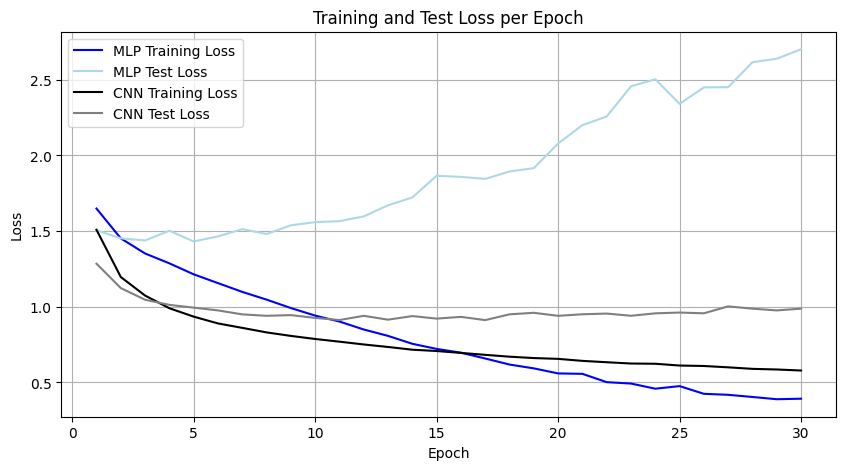

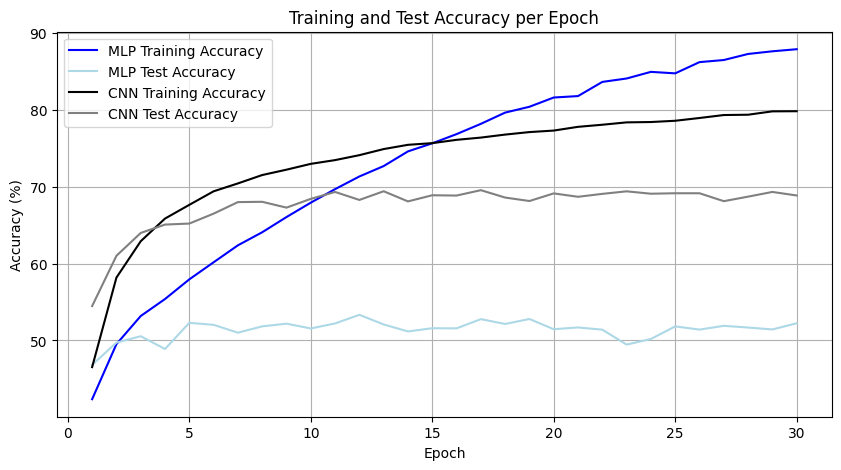

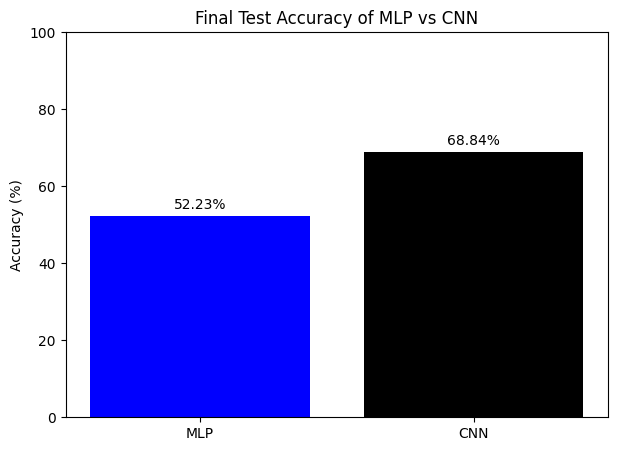

In [5]:
# Modify the train function to return loss and accuracy history for both train and test sets
def train(model, epochs=30): # Changed epochs to 30
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()
    train_loss_history = []
    train_accuracy_history = []
    test_loss_history = []
    test_accuracy_history = []


    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        correct_train = total_train = 0 # Initialize correct and total for training accuracy calculation
        for x, y in tqdm(train_loader):
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = criterion(pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

            # Calculate training accuracy
            correct_train += (pred.argmax(dim=1) == y).sum().item()
            total_train += y.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        train_loss_history.append(avg_train_loss)
        epoch_train_accuracy = correct_train / total_train * 100
        train_accuracy_history.append(epoch_train_accuracy)

        # Evaluate on test set after each epoch
        test_acc, test_loss = evaluate(model, criterion)
        test_accuracy_history.append(test_acc)
        test_loss_history.append(test_loss)


        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.2f}, Train Accuracy = {epoch_train_accuracy:.2f}%, Test Loss = {test_loss:.2f}, Test Accuracy = {test_acc:.2f}%")

    return train_loss_history, train_accuracy_history, test_loss_history, test_accuracy_history # Return all four history lists

# 🚀 Run MLP and store history
print("Training MLP:")
mlp = MLP()
mlp_train_loss_history, mlp_train_accuracy_history, mlp_test_loss_history, mlp_test_accuracy_history = train(mlp)


# 🚀 Run CNN and store history
print("\nTraining CNN:")
cnn = SimpleCNN()
cnn_train_loss_history, cnn_train_accuracy_history, cnn_test_loss_history, cnn_test_accuracy_history = train(cnn)


# Plotting the loss history
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mlp_train_loss_history) + 1), mlp_train_loss_history, label='MLP Training Loss', color='blue')
plt.plot(range(1, len(mlp_test_loss_history) + 1), mlp_test_loss_history, label='MLP Test Loss', color='lightblue')
plt.plot(range(1, len(cnn_train_loss_history) + 1), cnn_train_loss_history, label='CNN Training Loss', color='black')
plt.plot(range(1, len(cnn_test_loss_history) + 1), cnn_test_loss_history, label='CNN Test Loss', color='gray')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accuracy history
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mlp_train_accuracy_history) + 1), mlp_train_accuracy_history, label='MLP Training Accuracy', color='blue')
plt.plot(range(1, len(mlp_test_accuracy_history) + 1), mlp_test_accuracy_history, label='MLP Test Accuracy', color='lightblue')
plt.plot(range(1, len(cnn_train_accuracy_history) + 1), cnn_train_accuracy_history, label='CNN Training Accuracy', color='black')
plt.plot(range(1, len(cnn_test_accuracy_history) + 1), cnn_test_accuracy_history, label='CNN Test Accuracy', color='gray')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the final test accuracy - kept from previous code but using the last value from history
models = ['MLP', 'CNN']
# Use the last value from the test accuracy history for the final test accuracy
final_mlp_test_accuracy = mlp_test_accuracy_history[-1] if mlp_test_accuracy_history else 0
final_cnn_test_accuracy = cnn_test_accuracy_history[-1] if cnn_test_accuracy_history else 0

accuracies = [final_mlp_test_accuracy, final_cnn_test_accuracy]

plt.figure(figsize=(7, 5))
plt.bar(models, accuracies, color=['blue', 'black'])
plt.ylabel('Accuracy (%)')
plt.title('Final Test Accuracy of MLP vs CNN')
plt.ylim(0, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f"{acc:.2f}%", ha='center')
plt.show()